Step 1: Import required libraries. 

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Step 2: We will read the image by using “cv2.imread(image-name)” command & then convert this image into grayscale image using “cv2.cvtColor(image-name, cv2.COLOR_BGR2GRAY)” command.

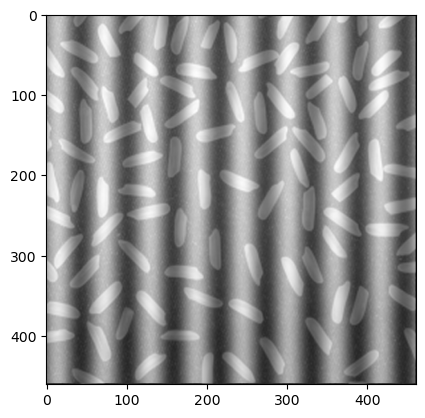

In [52]:
image_source = 'data/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png'
flag = 0
if 'sinus' in image_source:
  flag = 1
image = cv2.imread(image_source)
plt.imshow(image)

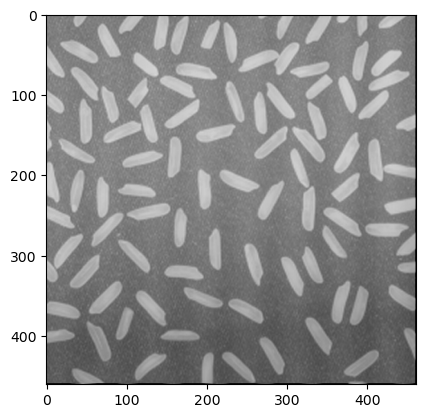

In [53]:
new_image = np.zeros(image.shape, image.dtype)
alpha = float(1.5)
sinus = 0
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    if(flag):
      sinus = 64*math.sin((3.14*x)/28.7)+50
    for c in range(image.shape[2]):
      new_image[y,x,c] = np.clip(alpha*(image[y,x,c] - sinus), 0, 255)
      #new_image[y,x,c] = np.clip(sinus,0,255)

plt.imshow(new_image, cmap='gray')


Step 3: For counting, we have to detect the edges but before detecting the edges we have to make the image blur to avoid the noises. Use “cv2.GaussianBlur(image-name, Kernal size, std. deviation)”. 

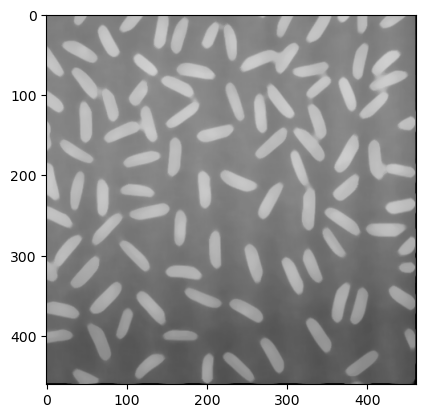

In [54]:
blur = cv2.medianBlur(new_image, 11, 0)
plt.imshow(blur, cmap='gray')

Step 4:  Now we will detect edges using a canny algorithm, 2nd & 3rd parameters in cv2.canny() function are threshold values. a value between 30 & 150 are consider as an edge for this image.

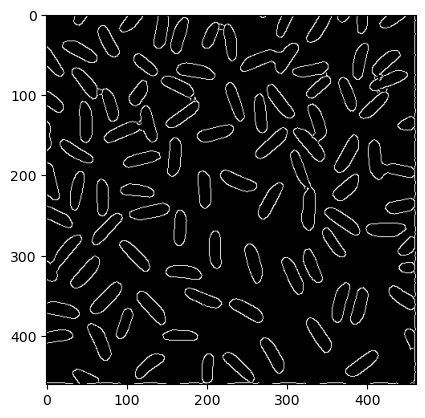

In [55]:
canny = cv2.Canny(blur, 30, 150)
plt.imshow(canny, cmap='gray')

Step 5: We can see that edges are not connected. We need to connect the edges, have to make edges thicker & more visible. 

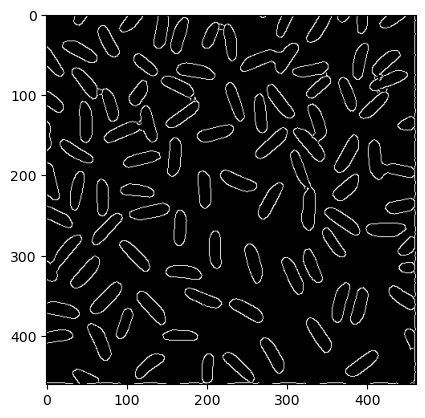

In [56]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

Step 6: Now we have to calculate the contour in the image & convert the image into RGB from BGR & then draw the contours.

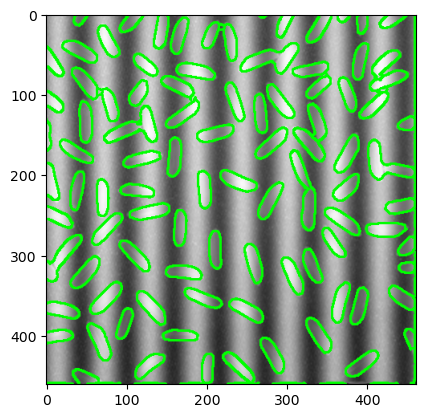

In [57]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  
plt.imshow(rgb)

Step 7: Printing the result



In [58]:
print("Number of grain of rice in the image : ", len(cnt))

Number of grain of rice in the image :  98


normal: 89
pepper: 93
sinus: 98
dark: 84
